# Maths DataScience - Master 2 DATAEN Ynov
**Probabilités et statistiques, Algèbre linéaire avec Python.**
**Simulation d'échantillons statistiques et applications.**

Ce premier atelier porte sur les échantillons statistiques. Un échantillon statistique est un ensemble $X_1, \cdots, X_n$ de variables aléatoires indépendantes et identiquement distribuées (i.i.d.) selon une même loi de distribution $P$. L'objectif est d'apprendre à simuler un échantillon, c'est à dire à faire un tirage aléatoire de la réalisation $x_1, \cdots, x_n$ d'un échantillon. Nous étudierons quelques méthodes de simulations pour des lois discrètes et continues. Nous verrons par ailleurs quelques applications de la simulation.  

In [1]:
# Imports 
from numpy.random import rand as Uniforme
# Pour savoir comment utiliser cette méthode, décommenter la ligne suivante:
# help(Uniforme)
import matplotlib.pyplot as plt
# help(plt.hist)
import numpy as np
import random

## 1. Loi uniforme

### 1.1. Simulation

Les langages de programmation proposent généralement des fonctions pour générer 
des suites pseudo-aléatoires de réalisations de variables aléatoires indépendantes de loi uniforme sur $[0,1]$. 
Python dispose notamment de la méthode **rand** du module **numpy.random**. Cette méthode peut s'importer dans un script sous le nom Uniforme avec l'instruction:

#### Exercice 1

Ecrire un programme qui simule un échantillon de taille $N$ fixée de loi uniforme sur $[0,1]$ et 
le stocke dans un vecteur $y$.

In [2]:
def echantillon_loi_uniforme(N) :
    """Création d'un échantillon de Taille N, de loi uniforme sur [0, 1]."""
    return [random.random() for _ in range(N)]

y = echantillon_loi_uniforme(1000)
print(y)

"""
# Code fournit pour l'exercice.
N = 1000
y = Uniforme(N)
print(y)
"""

[0.6160688843061328, 0.18831258639015724, 0.4552850321265052, 0.6250968084772466, 0.6671652787908664, 0.47993940343799757, 0.2415121260825417, 0.19711657370539803, 0.20132867781360875, 0.3011632477967182, 0.25425796940137435, 0.06856087066756156, 0.04893220010010413, 0.2298456779458945, 0.8272463665440684, 0.5982177459178246, 0.005750421219499868, 0.27218158389103686, 0.4839975921216787, 0.52350429021322, 0.3429344565508544, 0.6712500497584268, 0.17016957155209778, 0.6038328759948965, 0.06088229708534876, 0.12281165122420745, 0.3052173598466943, 0.9376301805416145, 0.601476057942309, 0.7676349793392144, 0.5075883813680009, 0.2999556694066915, 0.45019021751948063, 0.7407315678551494, 0.29303394990111853, 0.42261150703514216, 0.8944151581989455, 0.8427256692507158, 0.8346191127526336, 0.4024376780996278, 0.6339289915437208, 0.7931455860814792, 0.33453976399968677, 0.742507452931175, 0.22321251847768275, 0.07881676708569407, 0.7560632913515326, 0.8906134958641775, 0.4874207509666114, 0.04

"\n# Code fournit pour l'exercice.\nN = 1000\ny = Uniforme(N)\nprint(y)\n"

### 1.2. Histogramme

On peut analyser la distribution empirique d'un échantillon $y$ à l'aide d'un histogramme. Un histogramme est une fonction qui à un intervalle associe le nombre (ou le pourcentage) d'éléments de l'échantillon dont la valeur est dans l'intervalle. En Python, un histogramme peut être calculé et visualisé au moyen de la méthode **hist** du module **pyplot** de **matplotlib**. On peut importer ce module avec l'instruction suivante.

L'option **bins** de la fonction **hist** permet de prédéfinir les intervalles où l'histogramme est calculé. En mettant *bins=k*, on subdivise l'étendu des valeurs de $y$ en $k$ intervalles de même taille. En mettant *bins=Ik* où *Ik* est un vecteur de valeurs ordonnées, on précise les bornes des intervalles successifs. On peut en outre utiliser l'option  *normed=True* pour préciser que l'on souhaite les pourcentages de valeurs dans chaque intervalle. 

#### Exercice 2

1. Afficher l'histogramme de l'échantillon simulé.
2. La distribution correspond-elle à celle d'une loi uniforme ?
3. Que se passe-t-il lorsque l'on augmente la taille $N$ de l'échantillon ?
4. Que se passe-t-il lorsque l'on augmente la nombre $K$ d'intervalles ?
5. En appliquant la loi des grands nombres, justifier mathématiquement que, sur chaque intervalle $I$, l'histogramme approche la probabilité $P(I)$ de la loi de l'échantillon.

Rappel de la ***loi des grands nombres***:

Soient $(X_n)_n$ une suite de variables aléatoires i.i.d. ayant la même loi qu'une variable aléatoire $X$. Si $X$ est d'espérance et de variance finies, alors la moyenne empirique de l'échantillon,

$$ \overline{X}_n = \frac{1}{n} \sum_{i=1}^n X_i, $$

converge presque sûrement vers l'espérance $\mathbb{E}(X)$ de $X$.

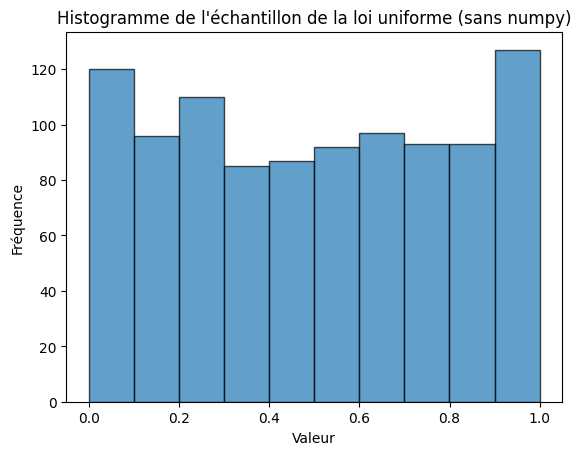

"\nRéponses :\n2. Oui, la distribution de l'échantillon simulé semble correspondre à celle d'une loi uniforme. Cela se traduit par une répartition relativement égale des valeurs sur l'intervalle [0,1], comme le montre l'histogramme.\n3. Lorsque la taille N tend à rassembler davantage à la densité de probabukuté de la distribution uniforme. Les valeurs répartis deviennentn plus homogènes, et les fluctuation dues au hasard se réduisent.\n4. L'augmentation de K (bins) permet d'avoir une représentation plus détaillées. C'est la division en nombre de colonne de l'échantillon.\n5. La loi des grands nombres stipule que la moyenne empirique d'un grand nombre d'observations indépendantes et identiquement distribuées avec une espérance finie tend presque sûrement vers l'espérance de la distribution. Pour une loi uniforme sur [0,1], l'espérance est 0.5 et la probabilité qu'une observation tombe dans un intervalle I donné est proportionnelle à la longueur de I. Ainsi, lorsque N augmente, le nombre

In [3]:
def histogramme(y, bins=10):
    """Affichage d'un historgramme sur la base d'un échantillon (y) et pour paramètre bins (k)."""
    plt.hist(y, bins=bins, edgecolor='black', alpha=0.7)
    plt.title('Histogramme de l\'échantillon de la loi uniforme (sans numpy)')
    plt.xlabel('Valeur')
    plt.ylabel('Fréquence')
    plt.show()

histogramme(y)

"""
Réponses :
1. Voir ci-dessus
2. Oui, la distribution de l'échantillon simulé semble correspondre à celle d'une loi uniforme. Cela se traduit par une répartition relativement égale des valeurs sur l'intervalle [0,1], comme le montre l'histogramme.
3. Lorsque la taille N tend à rassembler davantage à la densité de probabukuté de la distribution uniforme. Les valeurs répartis deviennentn plus homogènes, et les fluctuation dues au hasard se réduisent.
4. L'augmentation de K (bins) permet d'avoir une représentation plus détaillées. C'est la division en nombre de colonne de l'échantillon.
5. La loi des grands nombres stipule que la moyenne empirique d'un grand nombre d'observations indépendantes et identiquement distribuées avec une espérance finie tend presque sûrement vers l'espérance de la distribution. Pour une loi uniforme sur [0,1], l'espérance est 0.5 et la probabilité qu'une observation tombe dans un intervalle I donné est proportionnelle à la longueur de I. Ainsi, lorsque N augmente, le nombre relatif d'observations dans chaque intervalle I de l'histogramme tend vers la probabilité théorique P(I), qui pour une loi uniforme est égale à la longueur de l'intervalle I. Cela signifie que, pour un échantillon suffisamment grand, l'histogramme reflète fidèlement la densité de probabilité uniforme, avec une hauteur égale pour tous les intervalles.
"""

## 2. Loi de Bernoulli

### 2.1 Simulation 

Une variable aléatoire suit une loi de Bernoulli de paramètre $p$ dans $[0, 1]$
si elle prend la valeur $1$ avec probabilité $p$ et 0 avec la probabilité $1-p$.

Soit $U$ une variable uniforme sur $[0, 1]$. On définit la variable aléatoire
$$ X = \left\{ \begin{array}{lll} 1 & & \mathrm{si} \:\:  U<p, \\
  0 & & \mathrm{sinon}. \end{array} \right. $$

#### Exercice 3
1. Vérifier que $X$ suit une loi de Bernoulli de paramètre $p$.
2. Ecrire une fonction nommée *Bernoulli* qui simule la réalisation d'un échantillon de loi de Bernoulli en suivant le modèle ci-dessous.
3. Simuler un échantillon de loi de Bernoulli de paramètre $p=0.2$ et de taille $N=1000$.

In [11]:
def Bernoulli(p, n=1):
    """Crée un échantillon de taille n de la loi de Bernoulli de paramètre p.
    
    Remarque: On utilise le fait que lorsque U est une loi uniforme sur (0, 1), 
    la variable aléatoire qui vaut 1 si U<p et 0 sinon est de loi de Bernoulli 
    de paramètre p. En effet, P(B=1) = P(U<p) = p, P(B=0) = P(U>p) = 1-p.

    Parameters
    ----------
    p : scalar (in (0, 1))
        Paramètre de la loi de Bernoulli.
    n : int, optional
        Taille de l'échantillon (Valeur par défaut = 1).

    Returns
    -------
    ndarray
    Echantillon.
    """
    U = np.random.uniform(0, 1, n)
    # Conversion en 1 si U[i] < p, sinon en 0
    return (U < p).astype(int)

# Simulation d'un échantillon de loi de Bernoulli de paramètre p=0.2 et de taille N=1000
echantillon_bernoulli = Bernoulli(0.2, 1000)
# Affichage des premiers éléments de l'échantillon pour vérification
print(echantillon_bernoulli[:10])

""" 
Réponse :
1. P(X = 1) = P (U < p) = p ET P(X = 0) = P(U >= p) = 1 - p 
2. Voir ci-dessus
3. Voir ci-dessus
"""

[1 0 0 0 1 0 0 0 0 0]


' \nRéponse :\n1. P(X = 1) = P (U < p) = p ET P(X = 0) = P(U >= p) = 1 - p \n2. Voir ci-dessus\n3. Voir ci-dessus\n'

Pour analyser la distribution empirique d'un échantillon de loi discrète, on peut utiliser un diagramme en bâton. 
Ce diagramme donne, pour chaque valeur possible $a$, le nombre (ou le pourcentage) d'éléments de l'échantillon dont la valeur est $a$. Ce diagramme peut se calculer en Python au moyen de la méthode **bar** du module **plt**.

#### Exercice 4 

A l'aide d'un diagramme en bâton, vérifier que l'échantillon de Bernoulli est correctement simulé. 

Pour appliquer **bar**, il faut calculer au préalable le nombre d'occurrences de chaque valeur dans l'échantillon. Pour cela, on peut utiliser la fonction suivante.

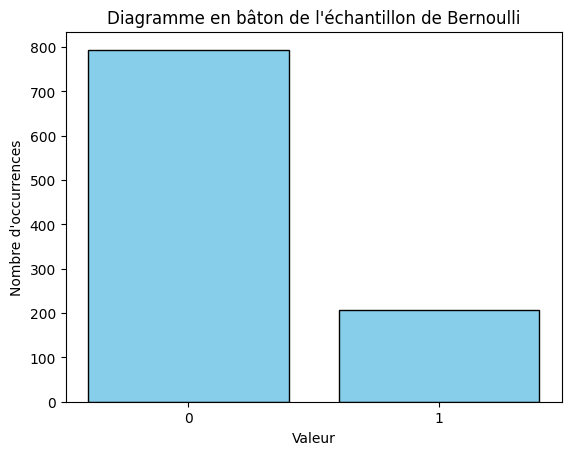

In [12]:
def occurrences(val, y):
    """Compte le nombre d'occurrences de chaque valeur de val dans l'échantillon y.

    Parameters
    ----------
    val : ndarray
        Valeurs.
    y : ndarray
        Echantillon.

    Returns
    -------
    occ : ndarray
        Nombre d'occurrences de chaque valeur dans l'échantillon.
        occ[k] : nombre d'occurences de la valeur val[k] dans l'échantillon y.
    """
    occ = np.zeros(val.size)
    for j in range(y.size):
        for k in range(val.size):
            if y[j] == val[k]:
                occ[k] += 1
                break
    return(occ)    

# Utilisation de l'échantillon de Bernoulli généré précédemment
val = np.array([0, 1])
occ = occurrences(val, echantillon_bernoulli)

# Affichage du diagramme en bâton
plt.bar(val, occ, color='skyblue', edgecolor='black')
plt.xlabel('Valeur')
plt.ylabel('Nombre d\'occurrences')
plt.title('Diagramme en bâton de l\'échantillon de Bernoulli')
plt.xticks(val)
plt.show()
# L'histogramme devrait montrer que la majorité des valeurs sont 0, ce qui est conforme à l'attente pour un paramètre p=0.2, où la probabilité d'obtenir 1 est de 0.2 et celle d'obtenir 0 est de 0.8. Cela confirme que l'échantillon a été correctement simulé selon la loi de Bernoulli spécifiée.

### 2.3. Quelques lois discrètes associées à la loi de Bernoulli.

### Loi binomiale.

Une variable aléatoire $X$ suit une loi binomiale $\mathcal{B}(K, p)$ de paramètres $(K,p)$ si, pour tout $k$ entier compris entre $0$ et $K$,
$$ \mathbb{P}(X=k) =  \left(\begin{array}{c} K \\ k \end{array}\right) p^k (1-p)^{K-k}. $$


#### Exercice 6

1. Montrer que la somme de $K$ variables aléatoires indépendantes de loi de Bernoulli $\mathcal{B}(p)$ suit une loi binomiale $\mathcal{B}(K, p)$.
2. En vous aidant de cette propriété, écrire une fonction *Binomiale* qui simule la réalisation d'un échantillon de loi binomiale $\mathcal{B}(K, p)$.
3. Simuler un $N$-échantillon de loi de Binomiale $\mathcal{B}(K, p)$ et apprécier la qualité de la simulation à l'aide d'un diagramme en bâton.
4. Faire varier les valeurs de $p$ et observer les changements d'allure de la distribution empirique.

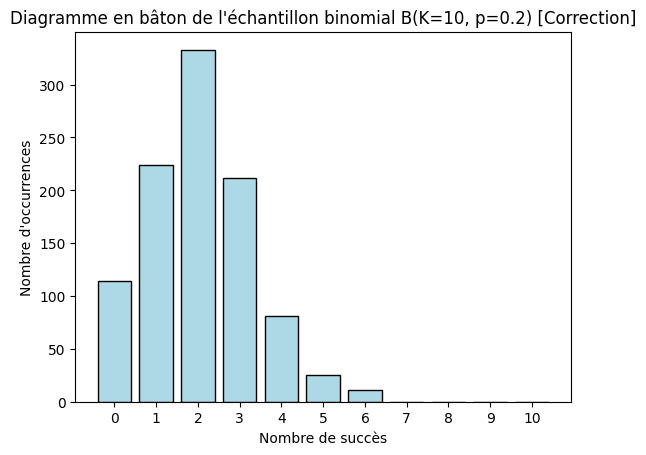

In [14]:
def Binomiale(p, k=1, n=1):
    """
    Crée un échantillon de taille n de la loi de Bernoulli de paramètre (k, p).
    
    Remarque: On s'appuie sur le fait que la somme de k variables aléatoires 
    indépendantes de loi de Bernoulli de paramètre p forme une variable 
    aléatoire de loi Binomiale de paramètres p et k.

    Parameters
    ----------
    p, k : 
        Paramètres de la loi binomiale.
        Par défaut k=1, ce qui correspond à une loi de Bernoulli.
    n : int, optional
        Taille de l'échantillon (valeur par défaut=1).
    Returns
    -------
    ndarray
    Echantillon.

    """
    return [np.sum(np.random.rand(k) < p) for _ in range(n)]

def occurrences_alternative(val, y):
    """Compte le nombre d'occurrences de chaque valeur de val dans l'échantillon y."""
    occ = np.zeros(len(val))
    for k in range(len(val)):
        occ[k] = np.sum(y == val[k])
    return occ

K = 10
p = 0.2
N = 1000
echantillon_binomiale = Binomiale(p, K, N)

# Calcul des occurrences pour le diagramme en bâton
val = np.arange(K+1)  # Toutes les valeurs possibles de 0 à K
occ_alternative = occurrences_alternative(val, echantillon_binomiale)

# Affichage du diagramme en bâton pour l'échantillon binomial avec la fonction corrigée
plt.bar(val, occ_alternative, color='lightblue', edgecolor='black')
plt.xlabel('Nombre de succès')
plt.ylabel('Nombre d\'occurrences')
plt.title('Diagramme en bâton de l\'échantillon binomial B(K=10, p=0.2) [Correction]')
plt.xticks(val)
plt.show()

### Loi géométrique

Une variable aléatoire $X$ à valeurs enti\`eres suit une loi géométrique $\mathcal{G}(p)$ de paramètre $p$ dans $]0,1[$ si, pour tout entier $k>0$,
  $$ \mathbb{P}(X=k) =  p \:\: (1-p)^{k-1}. $$

#### Exercice 7

1. Vérifier que le rang de la première variable valant $1$ dans une suite de variables aléeatoires indépendantes de loi de Bernoulli $\mathcal{B}(p)$ suit une loi géométrique $\mathcal{G}(p)$. 
2. En vous aidant de cette propriété, écrire une fonction *Geometrique* qui permet de simuler un échantillon de loi géométrique  $\mathcal{G}(p)$.
3. Simuler des $N$-échantillons de loi géométrique pour différentes valeurs de $p$.
4. Comparer les diagrammes en bâton des échantillons obtenus et discuter de leur forme selon les valeurs du paramètre $p$.


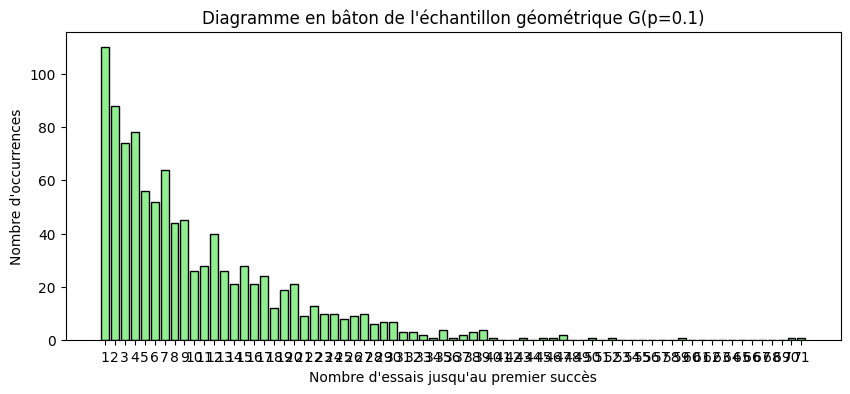

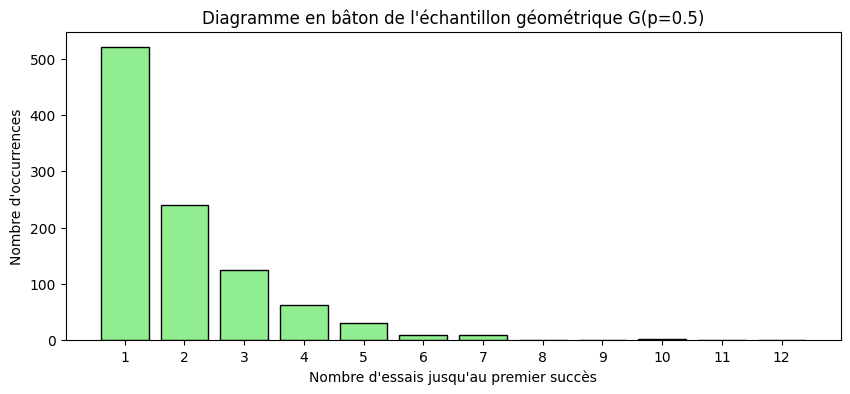

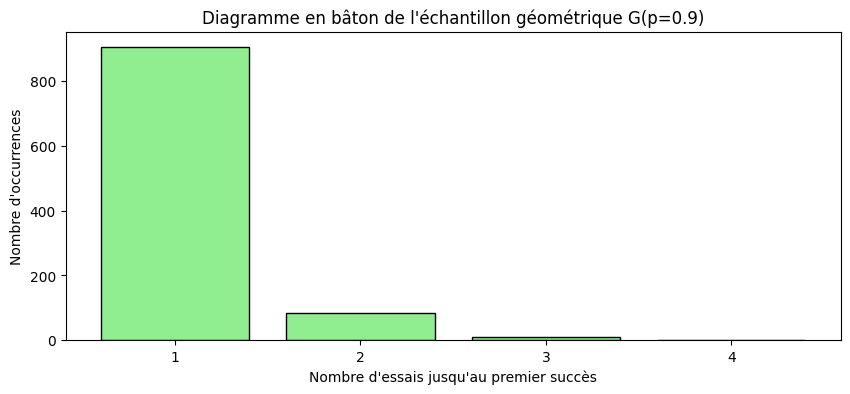

In [15]:
def Geometrique(p, n=1):
    """
    Crée un échantillon de taille n de la loi géométrique de paramètre p.

    Parameters
    ----------
    p : 
        Paramètre de la loi géométrique.
    n : int, optional
        Taille de l'échantillon. La valeur par défaut est 1.
    Returns
    -------
    y : ndarray
        Echantillon.

    """
    y = np.zeros(n)
    for i in range(n):
        count = 1  # Compteur pour le nombre d'essais jusqu'au premier succès
        while np.random.rand() >= p:  # Tant qu'un essai est un échec, continuer
            count += 1
        y[i] = count
    return y

# Simulation d'échantillons de loi géométrique pour différentes valeurs de p
p_values = [0.1, 0.5, 0.9]  # Différentes valeurs de p
N = 1000  # Taille de l'échantillon

# Création des échantillons et affichage des diagrammes en bâton
for p in p_values:
    echantillon_geometrique = Geometrique(p, N)
    val = np.arange(1, np.max(echantillon_geometrique) + 1)
    occ = occurrences_alternative(val, echantillon_geometrique)
    
    plt.figure(figsize=(10, 4))
    plt.bar(val, occ, color='lightgreen', edgecolor='black')
    plt.xlabel('Nombre d\'essais jusqu\'au premier succès')
    plt.ylabel('Nombre d\'occurrences')
    plt.title(f'Diagramme en bâton de l\'échantillon géométrique G(p={p})')
    plt.xticks(val)
    plt.show()

# Suivant les valeur de p, le nombre de découpe change.

## 3. Loi exponentielle.

La loi exponentielle $\mathcal{E}(\lambda)$ de paramètre $\lambda > 0$ est de densité 
    $$ f(t) = \left\{ \begin{array}{lll} \lambda e^{-\lambda t} & & \mathrm{si}\:\: t>0, \\ 0 & & \mathrm{sinon}. \end{array} \right. $$

### 3.1. Méthode d'inversion de la fonction de répartition.

#### Exercice 8
1. Soient $F$ une fonction de répartition $F$ strictement croissante et $U$ une variable aléatoire 
de loi uniforme sur $[0,1]$. Vérifier que la variable aléatoire $X=F^{-1}(U)$ admet $F$ comme fonction de répartition.
2. En déduire que, lorsque $U \sim \mathcal{U}([0,1])$, $Y=-\frac{1}{\lambda} \log(U) \sim \mathcal{E}(\lambda)$.
3. Construire une méthode pour simuler une variable de loi $\mathcal{E}(\lambda)$ et la mettre en oeuvre dans une fonction *Exponentielle*.

In [16]:
def Exponentielle(lam, n=1):
    """
    Crée un échantillon de taille n de la loi exponentielle de paramètre lambda.

    Parameters
    ----------
    lam : 
        Paramètre de la loi exponentielle.
    n : int
        Taille de l'échantillon.
    Returns
    -------
    expo : ndarray
        Echantillon.

    """
    U = np.random.uniform(0, 1, n)  # Génération de n variables U ~ U([0,1])
    return -1 / lam * np.log(U)  # Application de la transformation

# Exemple de simulation d'un échantillon de la loi exponentielle E(lambda=2) avec une taille de 1000
lam = 2
N = 1000
echantillon_exponentiel = Exponentielle(lam, N)

# Affichage des premiers éléments de l'échantillon pour vérification
echantillon_exponentiel[:10]

array([0.11157453, 0.48484999, 0.09041598, 0.51698172, 0.39784221,
       0.54617989, 0.42562973, 0.09965898, 0.17427993, 0.62188918])

### 3.2. Approximation de la fonction Gamma par une méthode de Monte Carlo.

La fonction $\Gamma$ est définie pour tout $a>0$ par l'intégrale 
$$ \Gamma(a)  = \int_{0}^{+\infty} x^{a-1} e^{-x} dx. $$
Pour $n \in \mathbb{N}^\ast$, cette fonction vaut $\Gamma(n) = (n-1)!$. Toutefois, les valeurs de $\Gamma$ ne sont pas connues en général. On se propose de les approcher par simulation. 

#### Exercice 9
1. Soit $X_1, \cdots, X_n$ un échantillon de loi exponentielle $\mathcal{E}(1)$. Pour $a>0$, on définit la variable aléatoire 
$$ G_n = \frac{1}{n} \sum_{i=1}^n X_i^{a-1}. $$
Justifier la convergence de $G_n$ vers $\Gamma(a)$ en précisant le sens de cette convergence.
2. En déduire une méthode d'approximation de $\Gamma(a)$.
3. Ecrire un programme qui permet d'approcher $\Gamma(a)$ et évaluer sa précision pour $a\in \mathbb{N}^\ast$. 

In [5]:
def approximer_gamma(a, n=10000):
    """
    Approxime la fonction Gamma(a) à l'aide d'un échantillon de taille n de la loi exponentielle E(1).

    Parameters
    ----------
    a : scalaire
        Paramètre de la fonction Gamma.
    n : int, optionnel
        Taille de l'échantillon pour l'approximation. La valeur par défaut est 10000.

    Returns
    -------
    approximation : scalaire
        Approximation de la fonction Gamma(a).
    """
    # Génération d'un échantillon de taille n de la loi exponentielle E(1)
    X = np.random.exponential(1, n)
    # Calcul de la moyenne de X^(a-1) sur l'échantillon
    G_n = np.mean(X**(a-1))
    return G_n

# Test de l'approximation pour différentes valeurs de a entières
a_values = [1, 2, 3, 4, 5]

for a in a_values:
    approximation_gamma = approximer_gamma(a)
    print(f"Approximation de Gamma({a}): {approximation_gamma:.4f}, Valeur attendue: {(a-1):.0f}!")

Approximation de Gamma(1): 1.0000, Valeur attendue: 0!
Approximation de Gamma(2): 0.9885, Valeur attendue: 1!
Approximation de Gamma(3): 1.9726, Valeur attendue: 2!
Approximation de Gamma(4): 6.1102, Valeur attendue: 3!
Approximation de Gamma(5): 25.6412, Valeur attendue: 4!


La fonction $\beta$ est définie pour tous $a, b>0$ par l'intégrale 
$$ \beta(a, b)  = \int_{0}^{1} x^{a-1} (1-x)^{b-1} dx. $$
Cette fonction est liée à la fonction $\Gamma$ par la relation
$$ \beta(a,b) =\frac{\Gamma(a) \Gamma(b)}{\Gamma(a+b)}. $$

#### Exercice 10
En vous inspirant de l'exercice 6, construire une méthode d'approximation de cette fonction qui s'appuie sur un échantillon de loi uniforme. 

In [4]:
def approximer_beta(a, b, n=10000):
    """
    Approxime la fonction beta(a, b) à l'aide d'un échantillon de taille n de la loi uniforme sur [0,1].
    """
    # Génération d'un échantillon de taille n de la loi uniforme sur [0,1]
    X = np.random.uniform(0, 1, n)
    # Calcul de la moyenne de x^{a-1}(1-x)^{b-1} sur l'échantillon
    moyenne = np.mean(X**(a-1) * (1-X)**(b-1))
    return moyenne

# Test de l'approximation pour différentes valeurs de a et b
a_b_test_pairs = [(0.5, 0.5), (1, 1), (2, 3), (5, 2)]

for a, b in a_b_test_pairs:
    approximation_beta = approximer_beta(a, b)
    print(f"Approximation de beta({a}, {b}): {approximation_beta:.4f}")


Approximation de beta(0.5, 0.5): 3.1740
Approximation de beta(1, 1): 1.0000
Approximation de beta(2, 3): 0.0834
Approximation de beta(5, 2): 0.0329


## 4. Loi normale

### 4.1. Simulation approchée

Soit une suite de variables aléatoires $$(X_1,\cdots,X_M,\cdots) $$ 
indépendantes et identiquement distribuées selon une même loi d'espérance $m$ et de variance $v$ finies. D'après le théorème centrale limite, la loi de la variable
$$ T_M = \sqrt{M} \frac{\frac{1}{M} \sum_{k=1}^M X_M - m}{\sqrt{v}} $$
tend vers une loi normale centrée réduite.  

#### Exercice 13

1. En vous appuyant sur ce théorème, construire une méthode pour simuler de manière approchée une variable gaussienne centrée réduite à partir d'un $M$-échantillon de loi uniforme sur $[0,1]$. 
2. Mettre en oeuvre cette méthode dans une fonction *Normale*.
3. Générer des échantillons de loi normale centrée réduite avec différentes valeurs de $M$ et comparer leurs distributions empiriques au moyen de l'histogramme. 

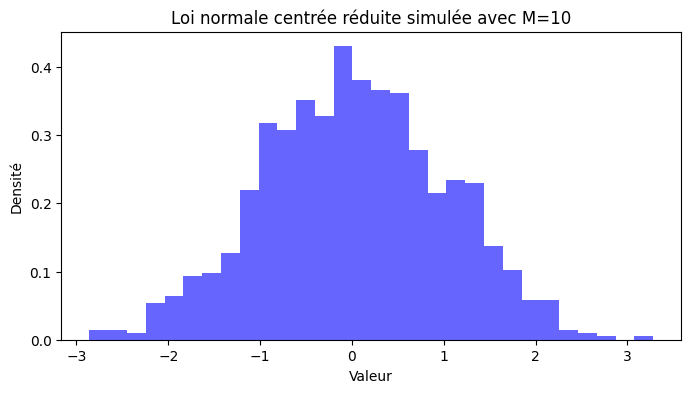

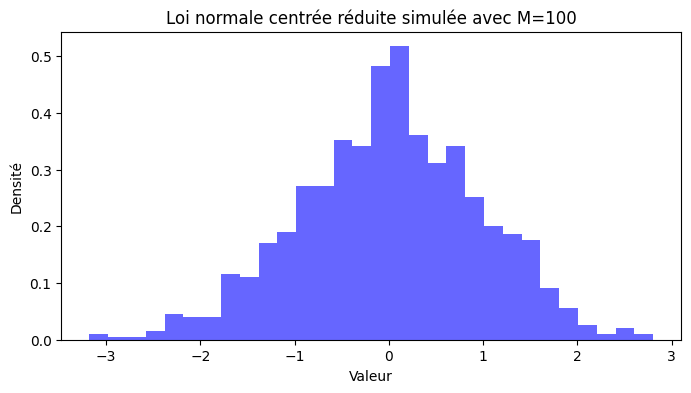

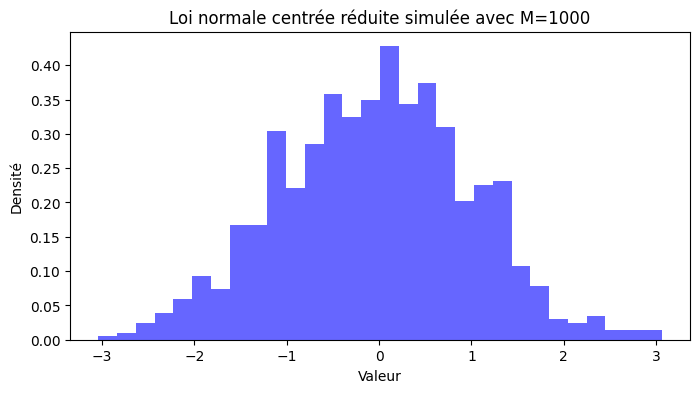

In [17]:
def Normale(n , m=100000):
    """
    Crée un échantillon de taille n de la loi normale centrée réduite.
    Méthode approchée qui se base sur le TCL.

    Parameters
    ----------
    n : int
        Taille de l'échantillon.
    m : int, optionnel.
        Taille de l'échantillon utilisé pour approcher la loi normale. 
        La valeur par défaut est 10000.
    Returns
    -------
    y: ndarray
        Echantillon.
    """
    y = np.zeros(n)
    for i in range(n):
        # Génération de M variables aléatoires uniformes sur [0,1]
        X = np.random.uniform(0, 1, m)
        # Application du TCL pour simuler une variable normale centrée réduite
        y[i] = np.sqrt(m) * (np.mean(X) - 0.5) / np.sqrt(1/12)
    return y

# Génération et comparaison des distributions empiriques pour différentes valeurs de M
M_values = [10, 100, 1000]  # Différentes valeurs de M
n = 1000  # Taille de chaque échantillon de loi normale

# Affichage des histogrammes pour chaque valeur de M
for M in M_values:
    echantillon_normale = Normale(n, M)
    plt.figure(figsize=(8, 4))
    plt.hist(echantillon_normale, bins=30, density=True, alpha=0.6, color='blue')
    plt.title(f'Loi normale centrée réduite simulée avec M={M}')
    plt.xlabel('Valeur')
    plt.ylabel('Densité')
    plt.show()


### 4.2. Approximation de l'intégrale de Gauss tronquée

Soit $Z$ une loi normale centrée réduite $\mathcal{N}(0, 1)$. Pour tout $a < b$,  
$$ P(Z \in [a, b]) = \frac{1}{\sqrt{2\pi}} I(a, b)$$
où 
$$ I(a,b) = \int_a^b e^{-\frac{x^2}{2}} dx$$
est une intégrale de Gauss tronquée.

#### Exercice 14
1. Construire une méthode pour approcher la valeur de cette intégrale à l'aide d'un échantillon de loi normale centrée réduite.
2. La mettre en oeuvre et évaluer sa précision pour $b=-a=1.96$ et différentes tailles d'échantillon.

In [2]:
def approximer_integrale_gauss(a, b, n):
    """
    Approche l'intégrale de Gauss tronquée I(a, b) à l'aide d'un échantillon de taille n
    de la loi normale centrée réduite.
    """
    # Génération d'un échantillon de taille n de la loi normale centrée réduite
    echantillon = np.random.normal(0, 1, n)
    # Calcul de la proportion de l'échantillon qui tombe dans l'intervalle [a, b]
    proportion = np.mean((echantillon >= a) & (echantillon <= b))
    # Approximation de l'intégrale en ajustant avec le facteur de normalisation
    approximation = proportion * (1/np.sqrt(2*np.pi))
    return approximation

# Paramètres de l'intégrale
a, b = -1.96, 1.96

# Tailles d'échantillon pour évaluer la précision
tailles_echantillon = [100, 1000, 10000, 100000]

# Calcul et affichage de l'approximation de l'intégrale pour chaque taille d'échantillon
for n in tailles_echantillon:
    approximation = approximer_integrale_gauss(a, b, n)
    print(f"Taille d'échantillon: {n}, Approximation de P(Z dans [{a}, {b}]): {approximation:.4f}")


Taille d'échantillon: 100, Approximation de P(Z dans [-1.96, 1.96]): 0.3830
Taille d'échantillon: 1000, Approximation de P(Z dans [-1.96, 1.96]): 0.3754
Taille d'échantillon: 10000, Approximation de P(Z dans [-1.96, 1.96]): 0.3800
Taille d'échantillon: 100000, Approximation de P(Z dans [-1.96, 1.96]): 0.3787


In [3]:
def approximer_proba_gauss(a, b, n):
    """
    Approche la probabilité P(Z dans [a, b]) pour une loi normale centrée réduite
    à l'aide d'un échantillon de taille n.
    """
    # Génération d'un échantillon de taille n de la loi normale centrée réduite
    echantillon = np.random.normal(0, 1, n)
    # Calcul de la proportion de l'échantillon qui tombe dans l'intervalle [a, b]
    proportion = np.mean((echantillon >= a) & (echantillon <= b))
    return proportion

# Calcul et affichage de l'approximation de la probabilité pour chaque taille d'échantillon
for n in tailles_echantillon:
    approximation = approximer_proba_gauss(a, b, n)
    print(f"Taille d'échantillon: {n}, Approximation de P(Z dans [{a}, {b}]): {approximation:.4f}")

Taille d'échantillon: 100, Approximation de P(Z dans [-1.96, 1.96]): 0.9400
Taille d'échantillon: 1000, Approximation de P(Z dans [-1.96, 1.96]): 0.9380
Taille d'échantillon: 10000, Approximation de P(Z dans [-1.96, 1.96]): 0.9509
Taille d'échantillon: 100000, Approximation de P(Z dans [-1.96, 1.96]): 0.9492
